<a href="https://colab.research.google.com/github/VensaHerald/Terminal/blob/master/titania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
url = "https://raw.githubusercontent.com/VensaHerald/titania/master/train.csv"
df_t = pd.read_csv(url)
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Did more men or women die on the Titanic


In [31]:
df_t[df_t["Survived"]==0]["Sex"].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [32]:
df_t[df_t["Age"].isna()].shape[0]/df_t.shape[0]

0.19865319865319866

###What was the average age of those who died, and those who survived?
Before I can answer this, I need to sort out the data. From the above cell we can see that there are 20% rows missing age data.  So I will need to drop these from the dataset before beginning


In [33]:
df_dr_age = df_t.dropna(subset=["Age"])
df_dr_age[df_dr_age["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Now these values have been dropped we can look at this column in more detail.  We'll do a histogram to get the lay of the land regarding the distribution of each group (whole pop, survived, non-survived).  And then produce the values of the mean at the end.

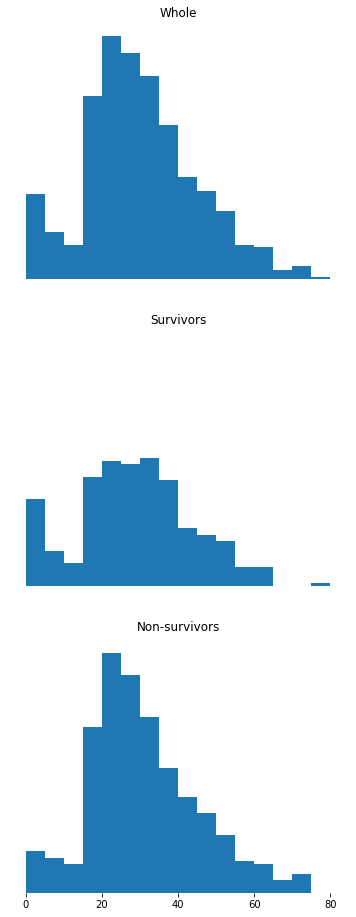

In [34]:
survived = df_dr_age[df_dr_age["Survived"] == 1]
died = df_dr_age[df_dr_age["Survived"] == 0]
titles = ["Whole","Survivors","Non-survivors"]
fig = plt.figure(figsize=(6,16))

for a in range(0,3):
    ax = fig.add_subplot(3,1,a+1)
    ax.set_ylim(0,80)
    ax.set_title(titles[a])
    ax.tick_params(bottom=False, right=False, top=False, left=False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)

    if a == 0:
        ax.hist(df_dr_age["Age"], range=(0,80),bins=16)
        ax.set_ylim((0,120))
        
    elif a == 1:
        ax.hist(survived["Age"], range=(0,80), bins=16)
    else:
        ax.hist(died["Age"], range=(0,80),bins=16)
        ax.tick_params(bottom=True)
        ax.set_xticks([0,20,40,60,80])


In [35]:
mean_sur = round(survived["Age"].mean(),2)
mean_nsur = round(died["Age"].mean(),2)
print("Mean survivor was:{}. \nMean non-survivor was:{}".format(mean_sur, mean_nsur))

Mean survivor was:28.34. 
Mean non-survivor was:30.63


###Is there any correlation between rate of surviving and Age
We'll produce a scatter chart to determine whether there is a visible correlation between these two properies.

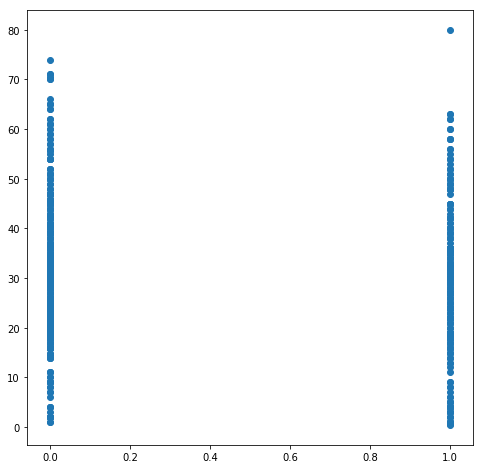

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_dr_age["Survived"], df_dr_age["Age"])

This is hard to view any kind of correlation, so lets look at this mathematically.

First lets look at the variance of the "Age" parameter for each person (sample).

In [37]:
variance_age = ((df_dr_age["Age"] - df_dr_age["Age"].mean())**2).mean()
n = df_dr_age.shape[0]
variance_age * (n/(n-1))

variance_sur = ((df_dr_age["Survived"] - df_dr_age["Survived"].mean())**2).mean()
variance_sur

0.24119451702249717

And the standard deviation

In [0]:
std_dev_age = variance_age ** 0.5

std_dev_sur = variance_sur ** 0.5

Now lets calculate the Pearsons correlation coefficient for the Age parameter and survived parameters.  Starting with the covariance of each parameter

In [0]:
#@params x - pandas series
#@params y - pandas series
#@return float
def pear_cor(x, y):
    cov = ((x - x.mean()) * (y - y.mean())).mean()
    std_dev_x = ((x - x.mean())**2).mean()**0.5
    std_dev_y = ((y - y.mean())**2).mean()**0.5
    return cov / (std_dev_x * std_dev_y)


cov = (df_dr_age["Age"] - df_dr_age["Age"].mean()) * (df_dr_age["Survived"] - df_dr_age["Survived"].mean())
cov = cov.mean()


In [40]:
pear_cor_1 = cov / (std_dev_age * std_dev_sur)
pear_cor_1

-0.07722109457217735

In [41]:
pear_cor_test = pear_cor(df_dr_age["Age"], df_dr_age["Survived"])
pear_cor_test

-0.07722109457217735

This appears to be a very weak negative correlation, let us compare it with other Pearsons values for Survived and other parameters.

In [42]:
df_dr_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [43]:
df_dr = df_dr_age.copy()
df_dr = df_dr.dropna(subset=["Embarked"])
df_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [0]:
df_dr["Famsize"] = df_dr["SibSp"] + df_dr["Parch"]
df_dr["Gencat"] = pd.Categorical(df_dr["Sex"]).codes
df_dr["Embarcat"] = pd.Categorical(df_dr["Embarked"]).codes
#df_dr.info()

In [45]:
df_dr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Famsize,Gencat,Embarcat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,2


Famsize  
Gencat  
Embarcat  
Fare  
Age
Pclass

Survived

[Text(0, 0, 'Famsize'),
 Text(0, 0, 'Gencat'),
 Text(0, 0, 'Embarcat'),
 Text(0, 0, 'Fare'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'Pclass')]

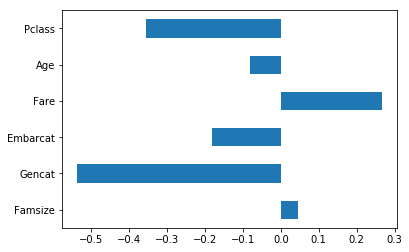

In [46]:
param1 = "Survived"
param2s = ["Famsize", "Gencat", "Embarcat", "Fare", "Age", "Pclass"]
pear_list = []

for a in param2s:
    pear_list.append(pear_cor(df_dr[param1], df_dr[a]))

pear_s = pd.Series(pear_list)

ax = pear_s.plot(kind="barh")
ax.set_yticklabels(param2s)


It is now easier to see which parameters have various positive or negative correlations with the survival binary parameter.  

Gender and embarcation here are represented numerically.  For gender 1 is male and 0 is female.  So this chart would imply that as gender "increased" (ie. changed from female to male) survival would decrease.  

This is also the case for Pclass.  So as Pclass increases (ie. going downward in class standing) survival decreased.  

There also appears to be a weaker, but still evident correlation between place of embarkation and survival, but as this parameter has also be categorised, this may not be meaningful.  I will look into this next

In [47]:
df_dr["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

The values of Embarkation are S, C, Q, mapping to (2,0,1).  These correspond to Southhampton, Cherborg, Queenstown(Cork, IE) which the ship arrived at relatively.  This will need to be recategorised so that the coding is chronological, S:0, C:1, Q:2

In [0]:
df_dr["Embarcat"] = pd.Categorical(df_dr["Embarked"], ["S","C","Q"]).codes


[Text(0, 0, 'Famsize'),
 Text(0, 0, 'Gencat'),
 Text(0, 0, 'Embarcat'),
 Text(0, 0, 'Fare'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'Pclass'),
 Text(0, 0, 'SibSp'),
 Text(0, 0, 'Parch')]

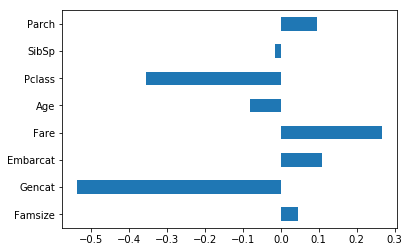

In [51]:
param1 = "Survived"
param2s = ["Famsize", "Gencat", "Embarcat", "Fare", "Age", "Pclass", "SibSp", "Parch"]
pear_list = []

for a in param2s:
    pear_list.append(pear_cor(df_dr[param1], df_dr[a]))

pear_s = pd.Series(pear_list)

ax = pear_s.plot(kind="barh")
ax.set_yticklabels(param2s)


After sorting the coding of point of embarkation we can now see a weak positive correlation between this parameter and survival rate.

We can now start to take a look at grouping these parameters.

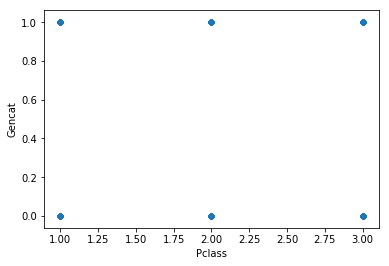